# Import necessary libraries

In [31]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load and preprocess the data

In [33]:
data = pd.read_csv(r'D:\Machine Learning\Internship\IMDB Dataset.csv\IMDB Dataset.csv')

In [34]:
pd.set_option('display.max_colwidth', None)
data.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [35]:
data.shape

(50000, 2)

In [36]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [37]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",positive
freq,5,25000


In [44]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [45]:
text = data['review'].values
labels = data['sentiment'].values

In [46]:
# Encode labels as integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [47]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(text)

In [48]:
sequences = tokenizer.texts_to_sequences(text)
padded_sequences = pad_sequences(sequences, maxlen=100)
labels = to_categorical(labels)

In [49]:
# Split the dataset into training and test sets
train_indices = np.random.choice(len(padded_sequences), int(len(padded_sequences)*0.9), replace=False)
test_indices = np.array(list(set(range(len(padded_sequences))) - set(train_indices)))
train_data = padded_sequences[train_indices]
train_labels = labels[train_indices]
test_data = padded_sequences[test_indices]
test_labels = labels[test_indices]

# Training the Model

In [50]:
# Define the model architecture
model = Sequential()
model.add(Embedding(10000, 128, input_length=100))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(32, activation='relu', dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

In [51]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 100, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,300,674
Trainable params: 1,300,674
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Train the model
history = model.fit(padded_sequences, labels, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 218s 150ms/step - loss: 2.4129 - accuracy: 0.7213 - val_loss: 0.4638 - val_accuracy: 0.7750
Epoch 2/10
1407/1407 [==============================] - 206s 146ms/step - loss: 2164.7158 - accuracy: 0.7939 - val_loss: 0.7079 - val_accuracy: 0.6266
Epoch 3/10
1407/1407 [==============================] - 208s 148ms/step - loss: 2.5055 - accuracy: 0.7517 - val_loss: 0.5100 - val_accuracy: 0.7454
Epoch 4/10
1407/1407 [==============================] - 210s 149ms/step - loss: 0.7356 - accuracy: 0.7775 - val_loss: 0.5388 - val_accuracy: 0.7476
Epoch 5/10
1407/1407 [==============================] - 192s 136ms/step - loss: 0.8950 - accuracy: 0.7852 - val_loss: 0.5809 - val_accuracy: 0.7422
Epoch 6/10
1407/1407 [==============================] - 174s 123ms/step - loss: 0.5625 - accuracy: 0.7838 - val_loss: 0.6079 - val_accuracy: 0.7358
Epoch 7/10
1407/1407 [==============================] - 172s 122ms/step - loss: 0.5417 - accuracy: 0.7941 - v

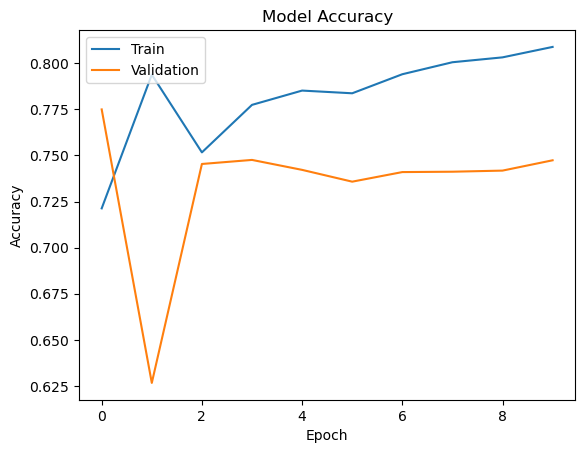

In [54]:
# Plot the accuracy history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [55]:
# Test the model on new data
test_text = ["This is a great movie", "I hate this food", "The service was terrible"]
test_sequences = tokenizer.texts_to_sequences(test_text)
padded_test_sequences = pad_sequences(test_sequences, maxlen=100)
predictions = model.predict(padded_test_sequences)

1/1 [==============================] - 1s 608ms/step


In [56]:
# Print the predicted sentiment labels
print(predictions.argmax(axis=1))

[1 0 0]


In [57]:
paragraph = "Climate change is a highly controversial and complex topic that has sparked intense debate among scientists, politicians, and the public at large. Some argue that the evidence for human-caused climate change is overwhelming, and that urgent action is needed to mitigate its effects. Others contend that the science is far from settled, and that natural factors such as sunspots and volcanic activity could be responsible for the observed changes in the Earth's climate.One thing that is clear is that the Earth's climate has changed dramatically over time, long before humans appeared on the scene. Ice ages have come and gone, sea levels have risen and fallen, and the planet has experienced periods of extreme heat and cold. Some argue that the current warming trend is simply part of a natural cycle, and that it will eventually reverse itself without human intervention.However, the overwhelming majority of scientific evidence suggests that the current warming trend is different from anything the Earth has experienced in the past. The concentration of greenhouse gases in the atmosphere has increased dramatically since the Industrial Revolution, largely as a result of human activity such as the burning of fossil fuels. This increase in greenhouse gases is causing the Earth's temperature to rise, leading to melting ice caps, rising sea levels, and more frequent and intense heatwaves, storms, and other weather events.Despite the scientific consensus on the reality and seriousness of climate change, there are still many skeptics who refuse to accept the evidence. Some argue that the data has been manipulated, or that scientists are simply pushing a political agenda."

In [58]:
# Tokenize the paragraph into sentences
sentences = nltk.sent_tokenize(paragraph)

# Convert sentences to sequences
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=100)

# Make predictions
predictions = model.predict(padded_sequences)

# Get the sentiment labels for each sentence
sentiment_labels = predictions.argmax(axis=1)

# Count the number of positive and negative sentences
num_positive = np.count_nonzero(sentiment_labels == 0)
num_negative = np.count_nonzero(sentiment_labels == 1)

1/1 [==============================] - 0s 31ms/step


In [59]:
# Print the number of positive and negative sentences
print(f"Number of positive sentences: {num_positive}")
print(f"Number of negative sentences: {num_negative}")

Number of positive sentences: 3
Number of negative sentences: 5


In [60]:
# Determine the overall sentiment of the paragraph
if num_positive > num_negative:
    overall_sentiment = "positive"
elif num_positive == num_negative:
    overall_sentiment = "neutral"
else:
    overall_sentiment = "negative"

# Print the overall sentiment
print(f"Overall sentiment: {overall_sentiment}")

Overall sentiment: negative


In [61]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

157/157 [==============================] - 2s 15ms/step - loss: 16.9377 - accuracy: 0.8300
Test accuracy: 0.8299999833106995


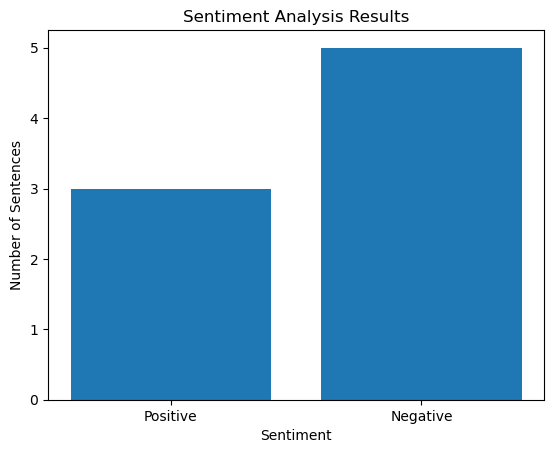

In [62]:
# Create a bar chart of the number of positive and negative sentences
fig, ax = plt.subplots()
ax.bar(['Positive', 'Negative'], [num_positive, num_negative])
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Sentences')
ax.set_title('Sentiment Analysis Results')
plt.show()

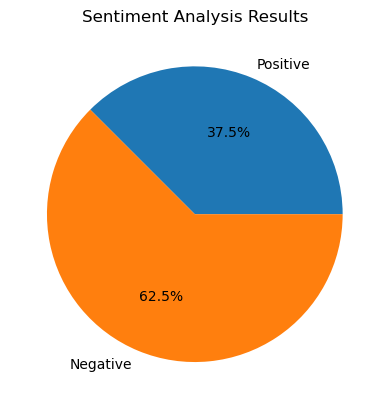

In [63]:
# Create a pie chart of the proportion of positive and negative sentences
fig, ax = plt.subplots()
ax.pie([num_positive, num_negative], labels=['Positive', 'Negative'], autopct='%1.1f%%')
ax.set_title('Sentiment Analysis Results')
plt.show()